<a href="https://colab.research.google.com/github/ExplorerGumel/ArewaDS-Pytorch-Fellowship-Solutions/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Jan 22 19:56:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Generally, Computer vision has applications in almost all industries but below are the 3 areas to which it's most applicabe;


1.   Autonomous driving vehicles
2.   Medical imaging
3.   Agriculture




## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting refers to the phenomena when the model perfectly(forcefully) fits to the training data but fail to reflect similar on the test data. It usually spotted by having higher score(almost perfect) on the training data while low score on the test data.



## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

3 Ways to mitigate overfitting are;



1.   Increase training samples
2.   reduce training time.
3.   Introduce regularization



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
#Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


# Training data
train_data = datasets.FashionMNIST(
    root="/content/", # directory
    train=True, # either train or test
    download=True, # download data
    transform=ToTensor(), # turn into Torch tensors
    target_transform=None
)

# Testing data
test_data = datasets.FashionMNIST(
    root="/content/", #
    train=False, # either train or test
    download=True, # download data
    transform=ToTensor() # turn into Torch tensors
)

100%|██████████| 26421880/26421880 [00:21<00:00, 1240918.08it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269254.52it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5011243.66it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5332743.14it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

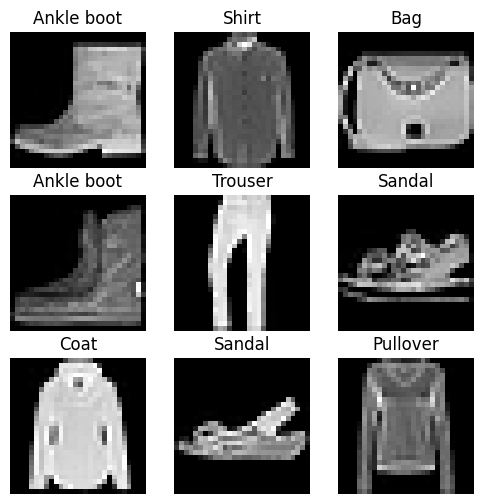

In [4]:
# Plot more images
import torch
class_names = train_data.classes

torch.manual_seed(42)
fig = plt.figure(figsize=(6, 6))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
batch_size = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=batch_size, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=batch_size,
    shuffle=False # don't necessarily have to shuffle the testing data
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# Create a convolutional neural network
from torch import nn

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
# A helper functions to print the timing and for training and validation loops


from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

def training_loop(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model = model
    for batch, (X, y) in enumerate(data_loader):

        # Send data to appropriate device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def testing_loop(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device): #
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")




In [9]:
# Import accuracy function

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)


# TRAINING ON GPU

In [10]:
torch.manual_seed(42)
model_2_gpu = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2_gpu

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [11]:
# Setup loss and optimizer
torch.manual_seed(42)
from tqdm.auto import tqdm
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2_gpu.parameters(),
                             lr=0.1)
# Measure time
train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    training_loop(data_loader=train_dataloader,
        model=model_2_gpu,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    testing_loop(data_loader=test_dataloader,
        model=model_2_gpu,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59039 | Train accuracy: 78.58%
Test loss: 0.40191 | Test accuracy: 85.66%

Epoch: 1
---------
Train loss: 0.36280 | Train accuracy: 86.90%
Test loss: 0.36102 | Test accuracy: 86.56%

Epoch: 2
---------
Train loss: 0.32425 | Train accuracy: 88.28%
Test loss: 0.32394 | Test accuracy: 88.14%

Epoch: 3
---------
Train loss: 0.30349 | Train accuracy: 88.90%
Test loss: 0.33427 | Test accuracy: 87.76%

Epoch: 4
---------
Train loss: 0.28902 | Train accuracy: 89.50%
Test loss: 0.30673 | Test accuracy: 88.84%

Train time on cuda: 65.112 seconds


# TRAINING ON CPU

In [12]:
## Changing the model device to cpu
device = "cpu"
model_2_cpu = model_2_gpu.to(device)
model_2_cpu

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [13]:
torch.manual_seed(42)

# Measure time

train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    training_loop(data_loader=train_dataloader,
        model=model_2_cpu,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    testing_loop(data_loader=test_dataloader,
        model=model_2_cpu,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.27947 | Train accuracy: 89.77%
Test loss: 0.31189 | Test accuracy: 88.93%

Epoch: 1
---------
Train loss: 0.27021 | Train accuracy: 90.22%
Test loss: 0.29160 | Test accuracy: 89.36%

Epoch: 2
---------
Train loss: 0.26334 | Train accuracy: 90.35%
Test loss: 0.29547 | Test accuracy: 89.61%

Epoch: 3
---------
Train loss: 0.25747 | Train accuracy: 90.58%
Test loss: 0.29547 | Test accuracy: 89.35%

Epoch: 4
---------
Train loss: 0.25372 | Train accuracy: 90.77%
Test loss: 0.28990 | Test accuracy: 89.68%

Train time on cpu: 235.832 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [14]:
import random
random.seed(42)
test_samples = []
test_labels = []

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit = model(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


for sample, label in random.sample(list(test_data), k=15):
    test_samples.append(sample)
    test_labels.append(label)

# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2_cpu,
                             data=test_samples)


# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)

pred_classes, test_labels


(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0]),
 [5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0])

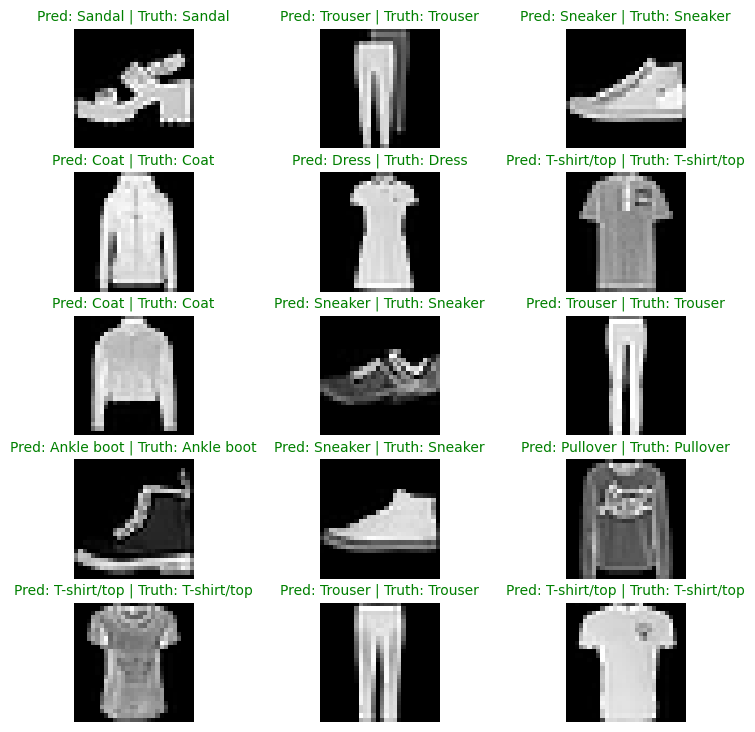

In [15]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 5
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [16]:
# 1. Make predictions with trained model
y_preds = []
model_2_cpu.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    #forward pass
    y_logit = model_2_cpu(X)
    # Turn predictions to predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [17]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.1 MB/s eta 0:00:00
mlxtend version: 0.23.1
0.23.1


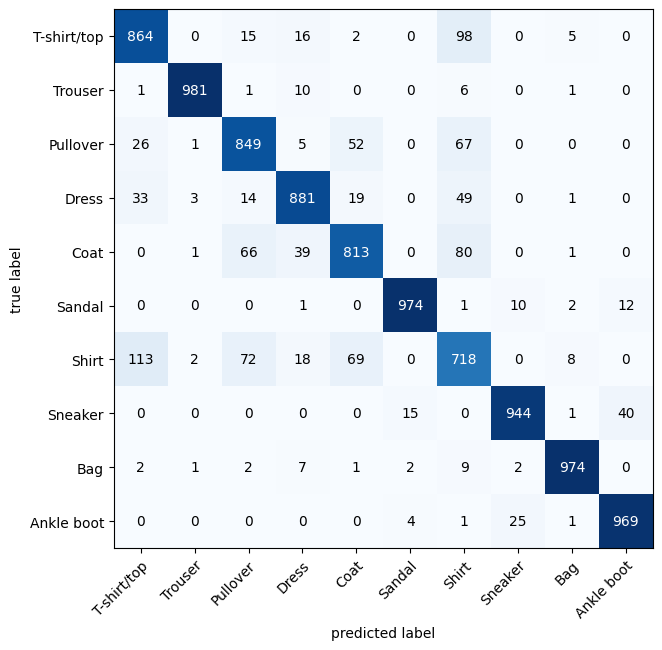

In [18]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [19]:
# create toy image
img = torch.randn(size=(1, 3, 64, 64))

# Create Conv2D layer
print(img[:1])

# kearnel size=5, stride=2, padding=1
conv2d = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=5,
                       stride=2,
                       padding=1)
print("\nThe conv2d implementation makes it\n")
print(conv2d(img)[:1])

tensor([[[[-2.2337e-01,  1.7174e+00,  3.1888e-01,  ...,  4.8354e-01,
           -1.9756e-01,  1.2683e+00],
          [ 7.8459e-01,  2.8647e-02,  6.4076e-01,  ...,  8.1234e-01,
           -3.0628e-01, -3.3016e-01],
          [ 2.4859e-02, -3.4595e-01,  2.8683e-01,  ...,  1.6896e+00,
            2.1274e-02, -8.2927e-01],
          ...,
          [-1.0848e+00,  7.7880e-01, -6.4616e-01,  ...,  1.8795e+00,
           -4.4449e-02, -5.3651e-01],
          [-5.9529e-01,  3.5622e-01,  3.2401e-02,  ..., -9.5975e-01,
           -1.4843e+00,  8.1555e-02],
          [-3.6422e-01, -4.7195e-01, -7.3298e-01,  ...,  6.6347e-01,
            2.2648e+00,  1.1145e+00]],

         [[-8.0302e-01,  4.6447e-01, -1.7090e-01,  ..., -2.0158e-01,
           -4.5202e-01, -1.7845e+00],
          [-1.0557e+00,  1.2461e+00, -7.2459e-01,  ...,  7.6180e-01,
           -2.2950e+00, -8.1860e-01],
          [ 1.0682e+00, -2.6366e+00,  6.9544e-01,  ...,  9.0535e-01,
           -8.6285e-01,  1.1450e-01],
          ...,
     

In [20]:
print(img[:1])

# kearnel size=5, stride=2, padding=1
conv2d = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=7,
                       stride=2,
                       padding=1)
print("\nThe conv2d implementation makes it\n")
print(conv2d(img)[:1])

tensor([[[[-2.2337e-01,  1.7174e+00,  3.1888e-01,  ...,  4.8354e-01,
           -1.9756e-01,  1.2683e+00],
          [ 7.8459e-01,  2.8647e-02,  6.4076e-01,  ...,  8.1234e-01,
           -3.0628e-01, -3.3016e-01],
          [ 2.4859e-02, -3.4595e-01,  2.8683e-01,  ...,  1.6896e+00,
            2.1274e-02, -8.2927e-01],
          ...,
          [-1.0848e+00,  7.7880e-01, -6.4616e-01,  ...,  1.8795e+00,
           -4.4449e-02, -5.3651e-01],
          [-5.9529e-01,  3.5622e-01,  3.2401e-02,  ..., -9.5975e-01,
           -1.4843e+00,  8.1555e-02],
          [-3.6422e-01, -4.7195e-01, -7.3298e-01,  ...,  6.6347e-01,
            2.2648e+00,  1.1145e+00]],

         [[-8.0302e-01,  4.6447e-01, -1.7090e-01,  ..., -2.0158e-01,
           -4.5202e-01, -1.7845e+00],
          [-1.0557e+00,  1.2461e+00, -7.2459e-01,  ...,  7.6180e-01,
           -2.2950e+00, -8.1860e-01],
          [ 1.0682e+00, -2.6366e+00,  6.9544e-01,  ...,  9.0535e-01,
           -8.6285e-01,  1.1450e-01],
          ...,
     

In [28]:
print(img[:1])

# kearnel size=5, stride=2, padding=1
conv2d = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=2,
                       padding=1)
print("\nThe conv2d implementation makes it\n")
print(conv2d(img)[:1])

tensor([[[[ 0.9281, -0.7739,  0.7662,  ..., -0.9521, -0.1975,  0.3863],
          [ 0.7328, -0.0837, -0.4086,  ..., -0.0497,  0.2005,  2.4254],
          [-0.0272,  0.8478, -0.1659,  ...,  0.4141,  0.0567, -0.4779],
          ...,
          [-0.9012, -1.5319, -1.2441,  ..., -1.5140, -1.5745,  1.1079],
          [-0.0358,  0.8764, -1.7333,  ...,  0.2546, -0.3857, -1.3129],
          [-1.8466, -2.8978, -0.9321,  ..., -1.2873, -0.7573, -1.5616]],

         [[ 0.3697, -0.0482,  0.0655,  ..., -0.6030,  0.5402,  0.5599],
          [ 2.9643, -0.3025,  0.4871,  ...,  0.7485, -0.0201,  1.1465],
          [-0.7852,  0.4210,  0.8919,  ..., -0.0274, -0.1052,  0.9033],
          ...,
          [-0.4535,  0.2509, -0.0051,  ..., -1.3216, -0.9094,  0.5703],
          [-0.2559,  1.6421,  0.8889,  ..., -0.5692, -0.9343,  0.5553],
          [ 1.6487, -0.5109,  0.0079,  ..., -0.7469,  0.7839,  0.4906]],

         [[-0.8900,  1.0773, -0.4623,  ...,  0.6284, -2.1643,  0.9505],
          [ 0.5773,  1.3111, -

In [31]:
print(img[:1][0][0])

# kearnel size=5, stride=2, padding=1
conv2d = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=12,
                       stride=2,
                       padding=1)
print("\nThe conv2d implementation makes it\n")
print(conv2d(img)[:1][0][0])

tensor([[ 0.9281, -0.7739,  0.7662,  ..., -0.9521, -0.1975,  0.3863],
        [ 0.7328, -0.0837, -0.4086,  ..., -0.0497,  0.2005,  2.4254],
        [-0.0272,  0.8478, -0.1659,  ...,  0.4141,  0.0567, -0.4779],
        ...,
        [-0.9012, -1.5319, -1.2441,  ..., -1.5140, -1.5745,  1.1079],
        [-0.0358,  0.8764, -1.7333,  ...,  0.2546, -0.3857, -1.3129],
        [-1.8466, -2.8978, -0.9321,  ..., -1.2873, -0.7573, -1.5616]])

The conv2d implementation makes it

tensor([[-1.6224e-01,  6.6881e-01,  5.0517e-02,  6.3520e-01, -2.5311e-01,
          5.3638e-01,  2.2624e-01,  4.7893e-01,  1.0508e-01, -1.1845e+00,
          5.0011e-01, -1.0369e-01, -2.2234e-01, -3.7340e-01, -9.2120e-01,
         -6.0886e-01, -9.4018e-02,  2.6732e-01, -6.0797e-01,  1.0939e-01,
         -1.6387e-01, -5.0911e-02,  4.8617e-01, -5.0419e-01,  2.0083e-01,
         -8.4449e-01,  5.2635e-01,  2.5985e-01],
        [-8.0264e-01, -1.5589e-01, -5.9108e-01,  4.4807e-01,  5.9844e-01,
         -3.6961e-01,  5.3825e-01,  

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [60]:
class FashionMNIST(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.block_3 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),

        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)
        return x

# Let's set device to gpu

devices = "cuda" if torch.cuda.is_available() else "cpu"

model_2s = FashionMNIST(input_shape=1,
    hidden_units=20,
    output_shape=len(class_names)).to(devices)
model_2s

FashionMNIST(
  (block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1

In [63]:
torch.manual_seed(19)

train_time_start_model_2 = timer()

optimizers = torch.optim.RMSprop(params=model_2s.parameters(), lr=0.001)
epochs = 15
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    training_loop(data_loader=train_dataloader,
        model=model_2s,
        loss_fn=loss_fn,
        optimizer=optimizers,
        accuracy_fn=accuracy_fn,
        device=devices
    )
    testing_loop(data_loader=test_dataloader,
        model=model_2s,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=devices
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=devices)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.40715 | Train accuracy: 86.66%
Test loss: 0.31897 | Test accuracy: 88.54%

Epoch: 1
---------
Train loss: 0.29911 | Train accuracy: 89.32%
Test loss: 0.30937 | Test accuracy: 88.45%

Epoch: 2
---------
Train loss: 0.26352 | Train accuracy: 90.47%
Test loss: 0.26935 | Test accuracy: 90.46%

Epoch: 3
---------
Train loss: 0.24549 | Train accuracy: 91.13%
Test loss: 0.26622 | Test accuracy: 90.44%

Epoch: 4
---------
Train loss: 0.22891 | Train accuracy: 91.68%
Test loss: 0.27023 | Test accuracy: 90.25%

Epoch: 5
---------
Train loss: 0.21732 | Train accuracy: 92.13%
Test loss: 0.25054 | Test accuracy: 90.95%

Epoch: 6
---------
Train loss: 0.20809 | Train accuracy: 92.56%
Test loss: 0.25978 | Test accuracy: 90.91%

Epoch: 7
---------
Train loss: 0.20014 | Train accuracy: 92.71%
Test loss: 0.25413 | Test accuracy: 90.93%

Epoch: 8
---------
Train loss: 0.19181 | Train accuracy: 93.00%
Test loss: 0.23171 | Test accuracy: 91.91%

Epoch: 9
---------
Train los

In [78]:
import random
random.seed(42)
test_samples = []
test_labels = []

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model_2s.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(devices)

            # Forward pass
            pred_logit = model_2s(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


for sample, label in random.sample(list(test_data), k=15):
    test_samples.append(sample)
    test_labels.append(label)

# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2s,
                             data=test_samples)


# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)

pred_classes, test_labels


(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0]),
 [5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0])

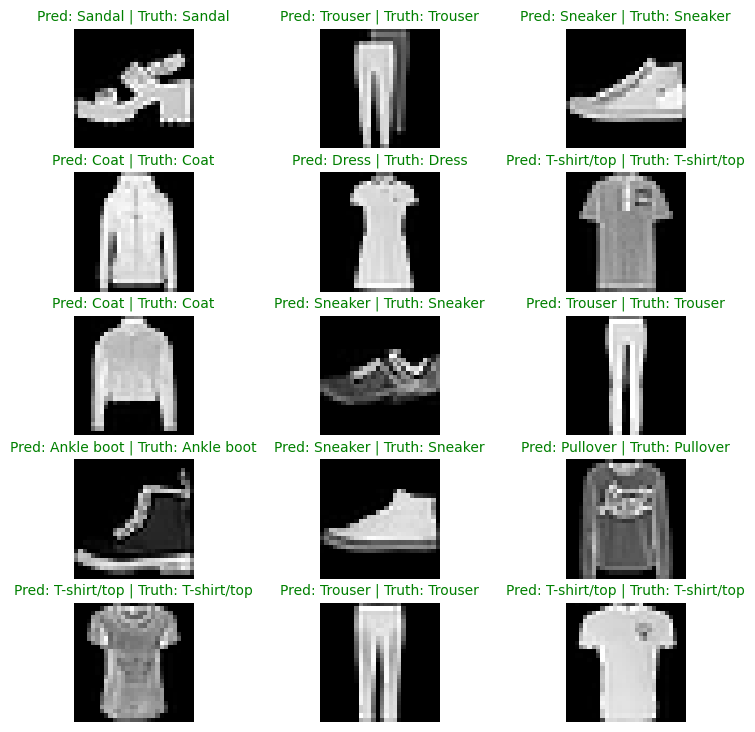

In [79]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 5
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

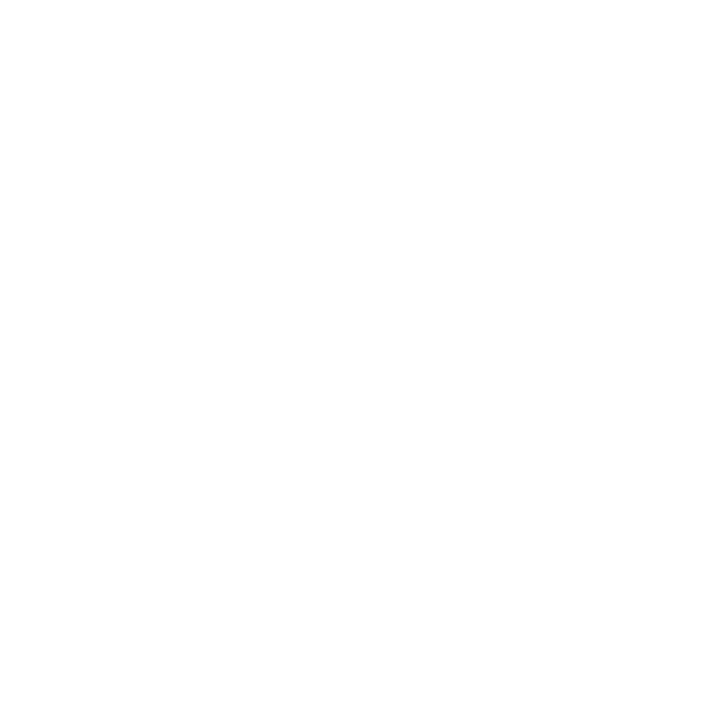

In [80]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 5
ncols = 3
for i, sample in enumerate(test_samples):
  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  if pred_label != truth_label:
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")


    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"


    plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

Even though the model is not 100% correct (though approximately), we can see that it perform quite well and luckily none of the 15 sampled images is incorrectly predicted. Furthermore through adding complexity to the model by adding more convolutions and changing the optimizer, we see that the model outperformed all the previous model built.